## Objective: Build a regressor that recommends the “crew” size for potential ship buyers.

### <font color='maroon'>Major steps followed:</font>

##### <font color='darkgreen'>1. Read the dataset and display columns.</font>
##### <font color='darkgreen'>2. Analysing the data and drawing the observations.</font>
##### <font color='darkgreen'>3. Selecting the variables that are used for predicting the crew size.</font>
##### <font color='darkgreen'>4. Creating train & test data.</font>
##### <font color='darkgreen'>5. Train a Multi-Regression ML model to predict the “crew” size.</font>
##### <font color='darkgreen'>6. Evaluating the Regression model by calculating the scores and drawing observations.</font>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### 1. Read the dataset and display columns:

In [2]:
#Reading a dataframe
df=pd.read_csv("home_work.csv")
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


#### 1.1 Summarising the data by calculating the count, mean, standard deviation, min, max:

In [3]:
#Returns summary of the data like count, mean, standard deviation, min, max
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


#### 1.2 Plotting the heatmap for all the attributes to find the correlation factor:

<AxesSubplot:>

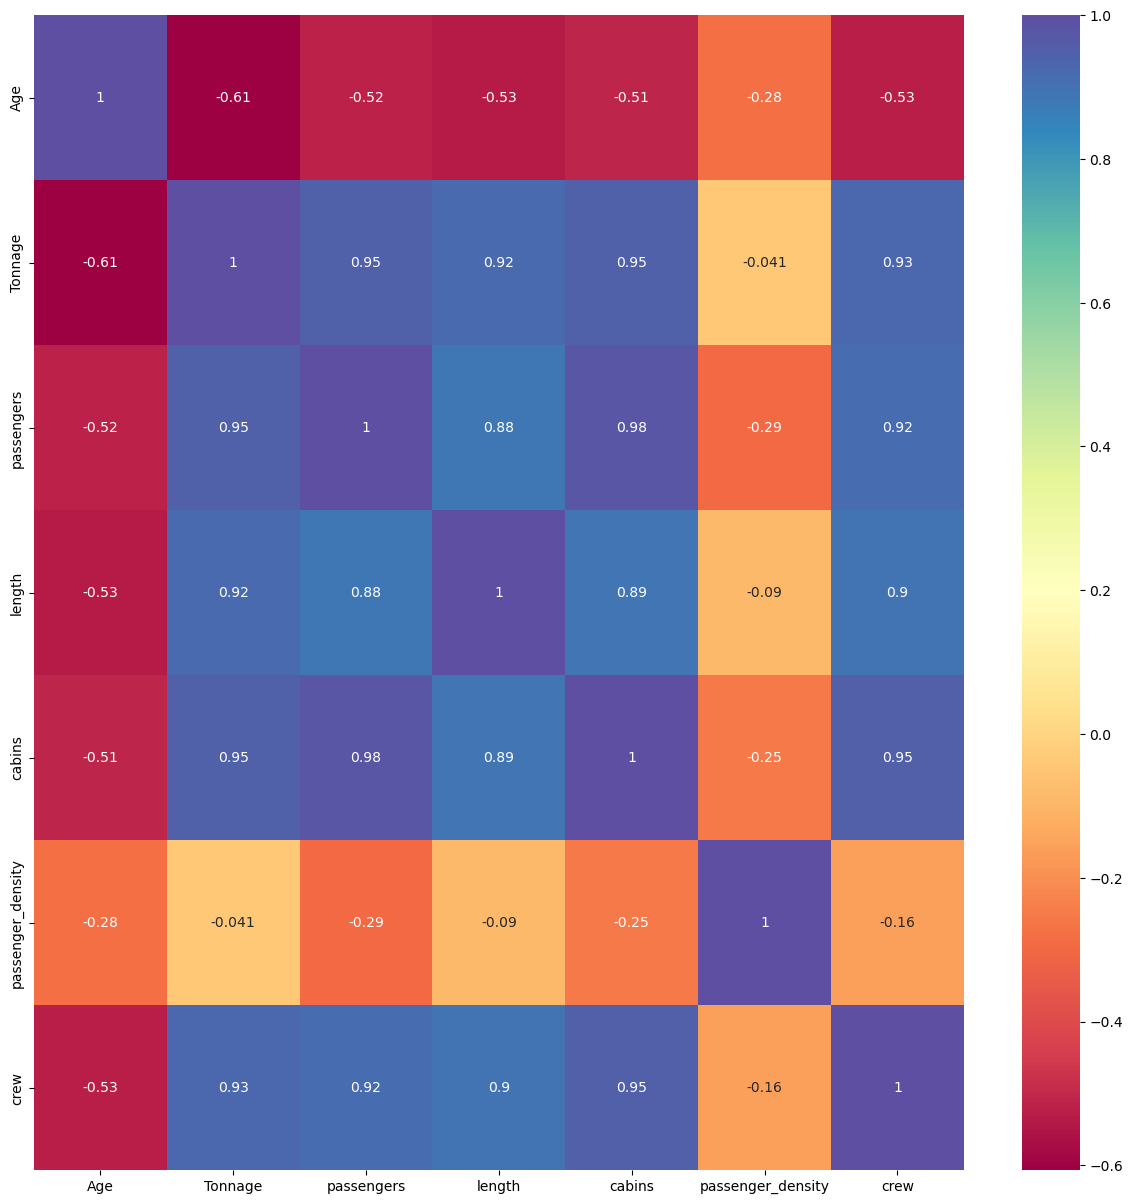

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='Spectral',annot=True)

#### 1.3 Few data visualisations:

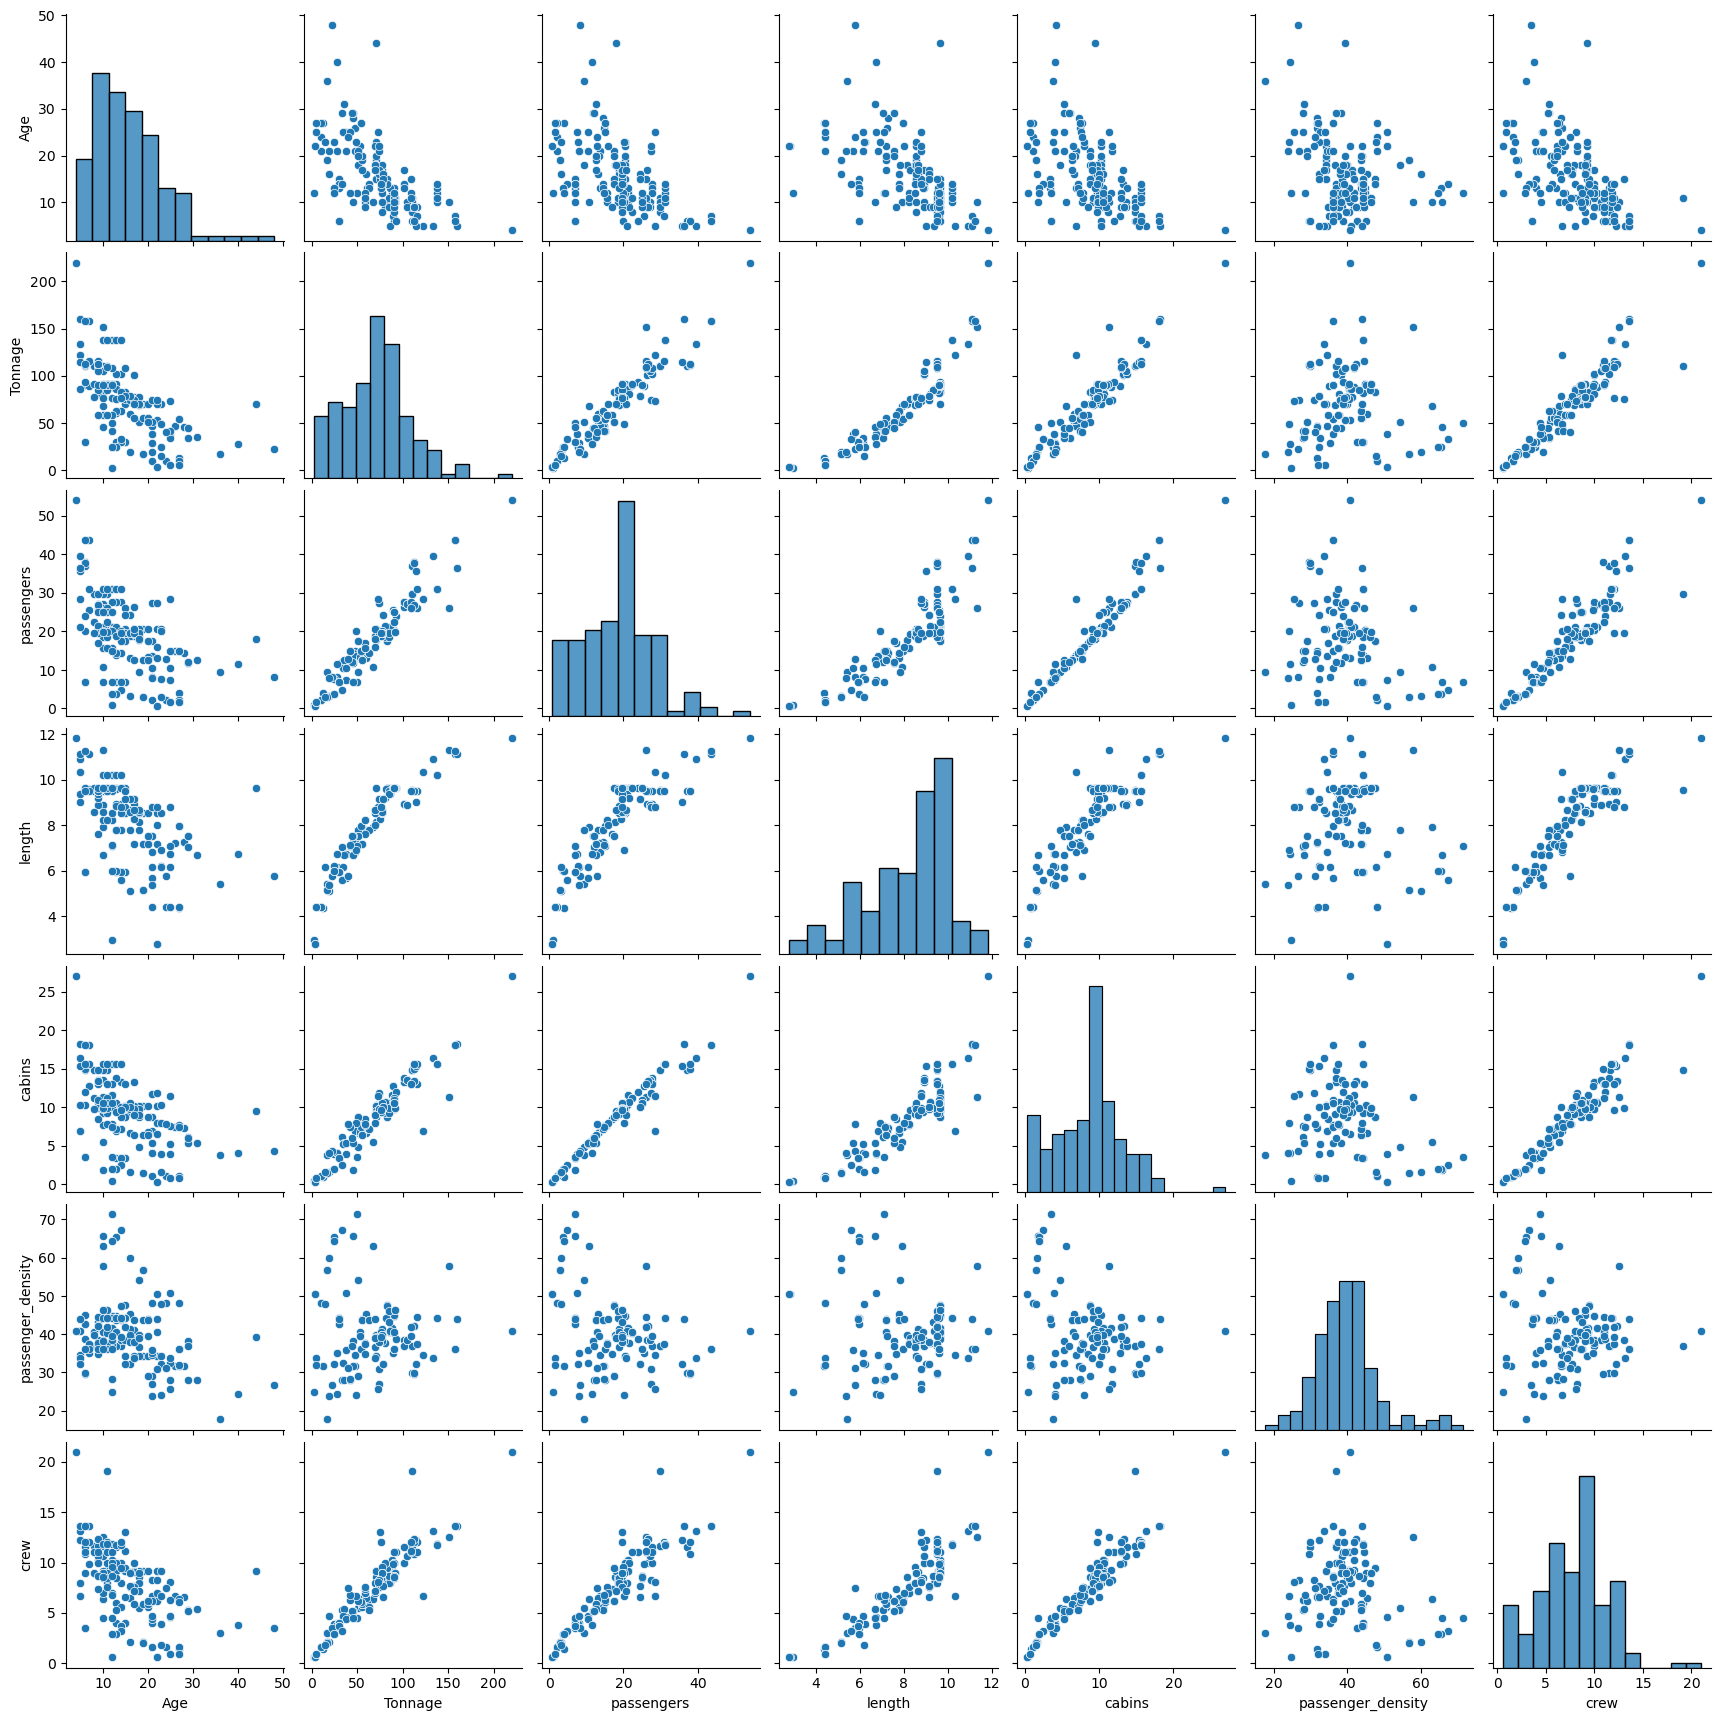

In [5]:
#Column names to list
col_name_list = df.columns.tolist()

#creating a pairplot for the columns
sns.pairplot(df[col_name_list])

### 2. Analyzing the data and drawing the observations:

 ##### <font color='red'> Observations from part 2:</font>
 
 ###### <font color='red'>Below graph is plotted to see the probability distribution of few attributes:</font>

##### <font color='green'> 1. From data, it is observed that variables are on different scales.</font>
##### <font color='green'> 2. For instance the Age variable ranges from 16 years to 48 years, while the Tonnage variable ranges from 2 to 220, respective probability density plots are as below.</font>
##### <font color='green'> 3. It is important that when a regression model is built using the variables, get those variables to same scale either by standardizing or normalizing the data. </font>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


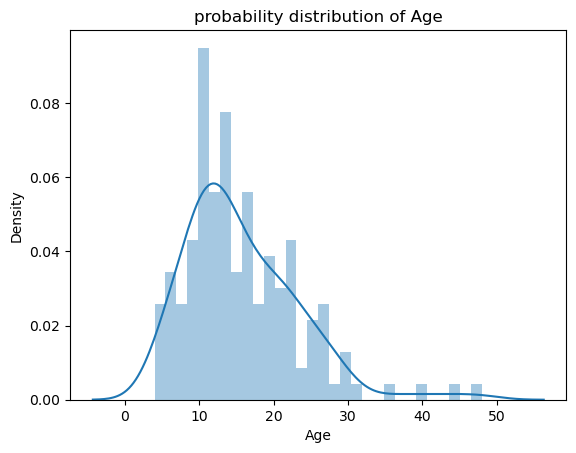

In [6]:
sns.distplot(df['Age'],bins=30)
plt.title('probability distribution of Age')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


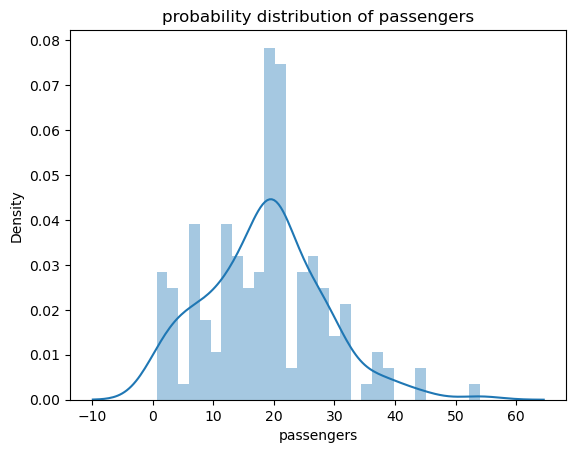

In [7]:
sns.distplot(df['passengers'],bins=30)
plt.title('probability distribution of passengers')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


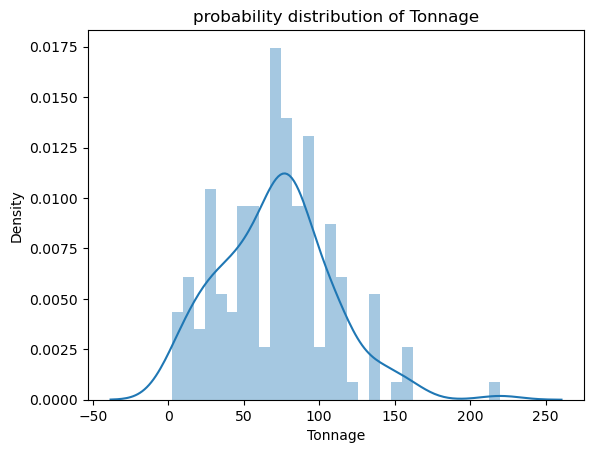

In [8]:
sns.distplot(df['Tonnage'],bins=30)
plt.title('probability distribution of Tonnage')
plt.show()

### 3. Selecting the variables that are used for predicting the crew size:

#### <font color='red'>3.1 Plotting Heatmap of covariance to show correlation between the coefficients: Helps in finding out the highly correlated coefficients using heatmap covariance</font>

In [9]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

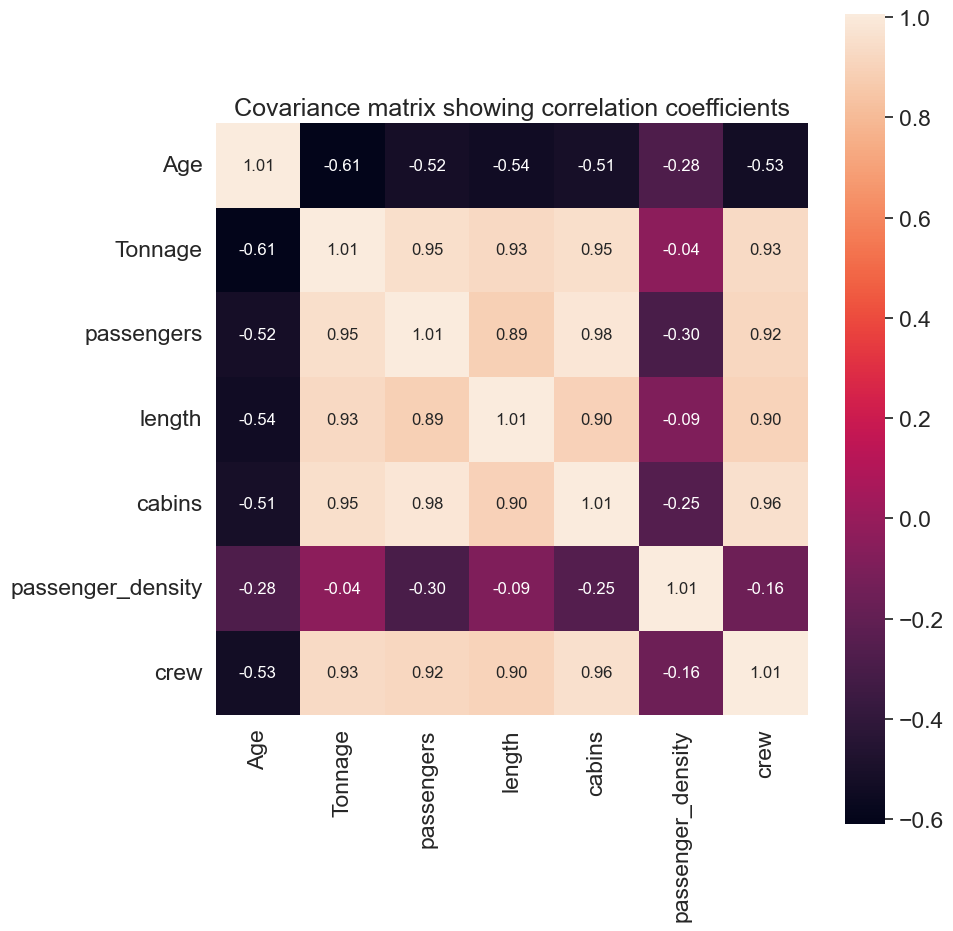

In [10]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

###### <font color='red'> Observation:</font>
##### <font color='green'> From the above the heatmap of cavariance matrix of correlations, we can observe and say that "CREW" column is strongly correlated with the columns "TONNAGE", "PASSENGERS", "LENGTH", "CABINS".</font>

#### <font color='red'>3.2 Using the Selected important variables (columns): Consider the variables (columns) from the above heatmap which has strong correlation</font>

In [11]:
selected_imp_cols = ['Tonnage', 'passengers', 'length', 'cabins','crew']

In [12]:
df[selected_imp_cols].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [13]:
X = df[selected_imp_cols].iloc[:,0:4].values    # features matrix 
y = df[selected_imp_cols]['crew'].values        # target variable

In [14]:
X.shape

(158, 4)

In [15]:
y.shape

(158,)

#### <font color='red'>3.3 Build one-hot encoding for the categorical values:</font>

In [16]:
df2=pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']]) 

In [17]:
df2.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


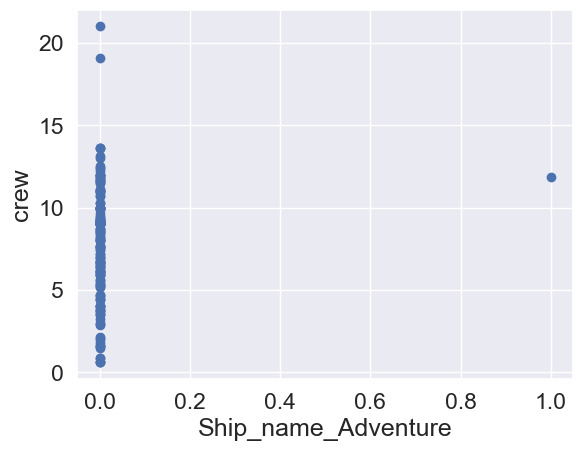

In [18]:
plt.scatter(df2['Ship_name_Adventure'],df2['crew'])
plt.xlabel('Ship_name_Adventure')
plt.ylabel('crew')
plt.show()

##### <font color='red'> Observations from part 3:</font>
##### <font color='green'>From above analysis part, we can come to few conclusions that to build and interpret a simple regression model we need to give our priority to the Ordinal values (ex: Tonnage, passengers, length & cabins), rather than categorical value (ex: Ship_name, Cruise_line)</font>

### 4: Creating training and test sets:

In [33]:
from sklearn.model_selection import train_test_split
X = df[selected_imp_cols].iloc[:,0:4].values     
y = df[selected_imp_cols]['crew']                     

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

### 5. Train a Multi-Regression ML model to predict the “crew” size:

In [35]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

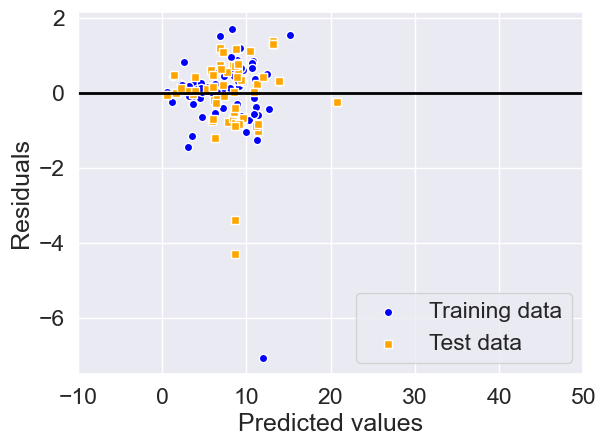

In [36]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='orange', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

### 6. Evaluating the regression model:

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.955, test: 0.889
R^2 train: 0.920, test: 0.928


In [38]:
slr.fit(X_train, y_train).intercept_

-0.7525074496158375

In [39]:
slr.fit(X_train, y_train).coef_

array([ 0.01902703, -0.15001099,  0.37876395,  0.77613801])

#### <font color='red'>6.1 Feature Reduction, Standardisation, Cross-Validation & Hyper-Parameter fine-tuning:</font>

In [48]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df[selected_imp_cols].iloc[:,0:4].values     
y = df[selected_imp_cols]['crew']  
from sklearn.preprocessing import StandardScaler
ss_y = StandardScaler()
ss_x = StandardScaler()
y_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()

/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/1173391867.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [49]:
train_score = []
test_score = []

In [50]:
from numpy.ma.core import shape
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#The purpose of the pipeline is to assemble several steps that can be cross-validated 
#together while setting different parameters.

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, 
                                                        random_state=i)
    y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),
                        ('slr', LinearRegression())]).fit(X_train, y_train_std)
    
    y_train_pred_std = pipe_lr.predict(X_train)
    y_test_pred_std = pipe_lr.predict(X_test)
    
    #======= Reshaping stops error, since inverse_transform expects a 2d ==========#
    y_train_pred_std = y_train_pred_std.reshape(-1,1)
    y_test_pred_std = y_test_pred_std.reshape(-1,1)
    #==============================================================================#
    
    y_train_pred = ss_y.inverse_transform(y_train_pred_std)
    y_test_pred = ss_y.inverse_transform(y_test_pred_std)
    
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/716005259.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/716005259.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/716005259.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
/

In [51]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [52]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [54]:
print('R2 train score: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('R2 test score: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 train score: 0.929 +/- 0.013
R2 test score: 0.912 +/- 0.021


#### <font color='red'>6.2 Different Methods of Dimensionality Reduction:</font>

##### <font color='brown'> 6.2.1 Principal Component Analysis (PCA):</font>

In [87]:
train_score = []
test_score = []
cum_variance = []

for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, 
                                                        random_state = 0)
    y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),
                        ('slr', LinearRegression())]).fit(X_train, y_train_std)
    
    y_train_pred_std = pipe_lr.predict(X_train)
    y_test_pred_std = pipe_lr.predict(X_test)
    
    #======= Reshaping stops error, since inverse_transform expects a 2d ==========#
    y_train_pred_std = y_train_pred_std.reshape(-1,1)
    y_test_pred_std = y_test_pred_std.reshape(-1,1)
    #==============================================================================#
    y_train_pred = ss_y.inverse_transform(y_train_pred_std)
    y_test_pred = ss_y.inverse_transform(y_test_pred_std)
    
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, 
                             np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/2464107954.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/2464107954.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/2464107954.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
/

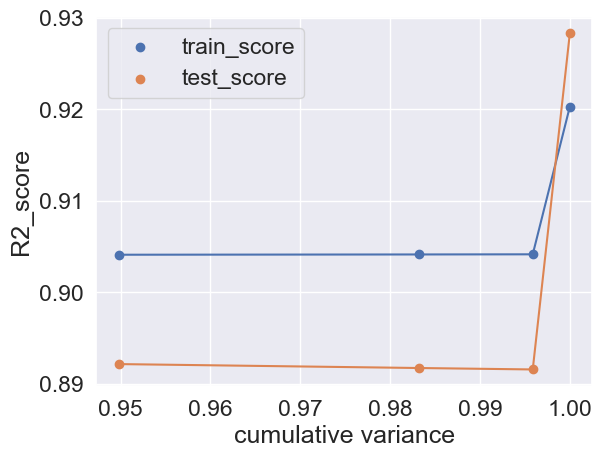

In [76]:
plt.scatter(cum_variance, train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance, test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

##### <font color='red'> Observation from R2_score vs Cumulative variance:</font>
##### <font color='green'> By increasing the principal component number from 1 to 4, train and scores also seems to be increasing. From this we can say that less number components leads to high bias error in the model as it is over simplified. At the same time by increasing it's count, bias is reducing whereas the model complexity is getting increased.</font>

##### <font color='brown'> 6.2.2 LASSO: Regularised Regression Analysis:</font>

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = ss_x.fit_transform(X_train)
X_test_std = ss_x.transform(X_test)

/var/folders/s3/5c2njdzn3_bddbvqh2x1g34m0000gn/T/ipykernel_13947/2276927718.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_std = ss_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [82]:
alpha = np.linspace(0.01,0.4,10)

In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7)

r2_train=[]
r2_test=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std=lasso.predict(X_train_std)
    y_test_std=lasso.predict(X_test_std)
    
    #======= Reshaping stops error, since inverse_transform expects a 2d ==========#
    y_train_std = y_train_std.reshape(-1,1)
    y_test_std = y_test_std.reshape(-1,1)
    #==============================================================================#
    
    r2_train=np.append(r2_train,r2_score(y_train,ss_y.inverse_transform(y_train_std)))
    r2_test=np.append(r2_test,r2_score(y_test,ss_y.inverse_transform(y_test_std)))
    
    #r2_train=np.append(r2_train,r2_score(y_train,ss_y.inverse_transform(y_train_pred_std)))
    #r2_test=np.append(r2_test,r2_score(y_test,ss_y.inverse_transform(y_test_pred_std)))
    
    norm= np.append(norm,np.linalg.norm(lasso.coef_))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, toleranc

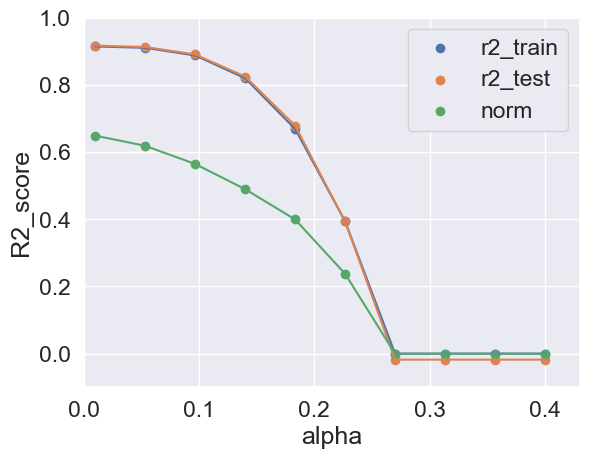

In [90]:
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

##### <font color='red'> Observation from LASSO plot:</font>
##### <font color='green'> From the above plot we can conclude that, as the alpha (regularising parameter) increases, the norm of regression coefficients parametric value keeps reducing and getting smaller and smaller with the value, which means that more regression coefficients are forced to zero, sintend increases bias error (over simplified model). The best value to balance bias-variance tradeoff is when is kept low, with alpha value less than or equal to 0.1</font>